In [1]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

## 1. Load Dataset
- Load the `prime_indians_diabetes` dataset
- Check the first five samples. Are there any categorical features?
- Is this a classification or regression problem?
- Check the columns of the dataset

 There are  8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- 2-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Class variable (0 or 1).

In [2]:
df=pd.read_csv("diabetes.csv")
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


All features appear numerical, not categorical. It is a classification problem since the target variable has discrete values 0 and 1.

In [3]:
print("\nColumns and Data Types:")
print(df.dtypes)


Columns and Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [4]:
output_var='Outcome'
print(f"\nTarget variable values:\n{df[output_var].unique()}")


Target variable values:
[1 0]


## 2. Data Preprocessing and Model
- Assign features to `X` and target variable to `y`
- Create a pipeline for preprocessing which includes imputing and standardscaling
- Create a pipeline for preprocessor and the random forest classifier. Set `n_estimators=100`
- Train the model and make your predictions on the test dataset
- List the feature importance and the corresponding features
- Create a bar plot for the feature importances
- Drop the least important feature from the data and repeat the steps above

In [5]:
zero_counts=(df==0).sum()

In [6]:
zero_counts

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [7]:
columns_with_missing=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[columns_with_missing]=df[columns_with_missing].replace(0,np.nan)

In [8]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [9]:
preprocessor=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',RandomForestClassifier(n_estimators=100,random_state=44))
])

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=44)

In [11]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', StandardScaler())])),
                ('classifier', RandomForestClassifier(random_state=44))])

In [12]:
y_pred=pipeline.predict(X_test)

In [13]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 77.92%


In [14]:
rf_model=pipeline.named_steps['classifier']

In [15]:
importances=rf_model.feature_importances_
features=X.columns

In [16]:
importance_df=pd.DataFrame({
    'Feature':features,
    'Importance':importances
}).sort_values(by='Importance',ascending=False)

print("\nFeature Importances:")
display(importance_df)


Feature Importances:


,Feature,Importance
1,Glucose,0.250451
5,BMI,0.151431
6,DiabetesPedigreeFunction,0.129491
7,Age,0.122690
4,Insulin,0.090210
2,BloodPressure,0.089788
3,SkinThickness,0.086330
0,Pregnancies,0.079608


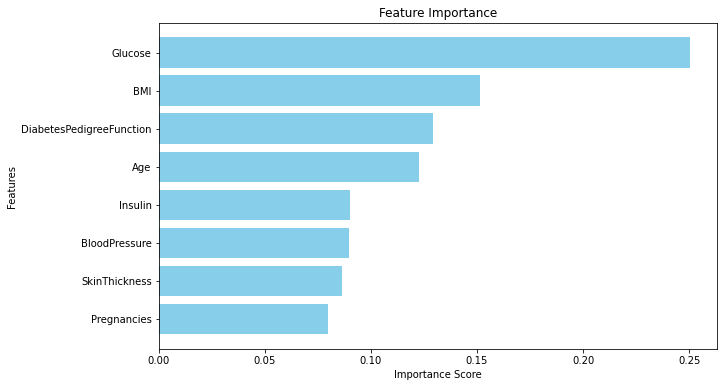

In [17]:
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'],importance_df['Importance'],color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [18]:
# Drop the least important feature
least_important_feature = importance_df.iloc[-1]['Feature']
X_dropped = X.drop(least_important_feature, axis=1)

# Repeat the steps above
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y, test_size=0.2, random_state=44)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluate accuracy after dropping the feature
accuracy_dropped = accuracy_score(y_test, y_pred)
print(f"Model Accuracy After Dropping {least_important_feature}: {accuracy_dropped * 100:.2f}%")


Model Accuracy After Dropping Pregnancies: 78.57%
